In [1]:
from src.MO_DQN import MO_DQN
import mo_gymnasium as mo_gym
from src.gridsearch import gridsearch
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting

### Configure and run the experiments

##### Test Double DQN

In [2]:
#experiment configurations
env_config_1 = {
        "collision_reward": -1,
        "observation": {
            "type": "MultiAgentObservation",
            "observation_config": {
                "type": "OccupancyGrid",
                "vehicles_count": 15,
                "features": ["presence", "x", "y", "vx", "vy"],
                "features_range": {
                    "x": [-100, 100],
                    "y": [-100, 100],
                    "vx": [-20, 20],
                    "vy": [-20, 20]
                },
                "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
                "grid_step": [5, 5],
            }
        }
    }

run_config = {
    "env": [env_config_1],
    "init": {
         "gamma": [0.9],
         "replay_buffer_size": [1000],
         "use_reward_normalisation_wrapper": [False],
         "use_default_reward_normalisation": [True],
         "network_hidden_sizes": [[128,128]],
         "use_double_q_learning": [True,False]


    },
    "train": {
         "num_iterations" : 150_000,
         "inv_target_update_frequency": 20,
         "epsilon_start": 0.9,
         "epsilon_end": 0
    },
    "eval": {
        "num_repetitions": 20,
        "num_points": 30,
        "episode_recording_interval": None,
        "render_episodes": False
    },
}

In [3]:
#run the experiments
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
gridsearch(MO_DQN, env, run_config, 11, csv_file_path="data/double_dqn/")

Directory data/double_dqn/ doesn't exist. Creating it now...



Weight tuple: 100%|██████████| 30/30 [12:58<00:00, 25.94s/it]

Weight tuple: 100%|██████████| 30/30 [12:54<00:00, 25.82s/it]




### Data preprocessing

In [2]:
#load the data
df_complete = pd.read_csv("data/double_dqn/experiment_merged.csv")
display(df_complete.info())
display(df_complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1200 non-null   int64  
 1   repetition_number                 1200 non-null   int64  
 2   weight_index                      1200 non-null   int64  
 3   weight_tuple                      1200 non-null   object 
 4   num_iterations                    1200 non-null   int64  
 5   normalised_speed_reward           1200 non-null   float64
 6   normalised_energy_reward          1200 non-null   float64
 7   raw_speed_reward                  1200 non-null   float64
 8   raw_energy_reward                 1200 non-null   float64
 9   env_config_id                     1200 non-null   int64  
 10  gamma                             1200 non-null   float64
 11  replay_buffer_size                1200 non-null   int64  
 12  use_re

None

,Unnamed: 0,repetition_number,weight_index,weight_tuple,num_iterations,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward,env_config_id,gamma,replay_buffer_size,use_reward_normalisation_wrapper,use_default_reward_normalisation,network_hidden_sizes,use_double_q_learning
0,0,0,0,"[0.0, 1.0]",80,0.088347,0.996360,7.067741,79.708761,0,0.9,1000,False,True,"[128, 128]",True
1,1,1,0,"[0.0, 1.0]",80,0.086847,0.994844,6.947724,79.587549,0,0.9,1000,False,True,"[128, 128]",True
2,2,2,0,"[0.0, 1.0]",80,0.087225,0.985343,6.978020,78.827474,0,0.9,1000,False,True,"[128, 128]",True
3,3,3,0,"[0.0, 1.0]",80,0.089117,0.997117,7.129385,79.769367,0,0.9,1000,False,True,"[128, 128]",True
4,4,4,0,"[0.0, 1.0]",80,0.097453,0.997885,7.796209,79.830796,0,0.9,1000,False,True,"[128, 128]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,595,15,29,"[1.0, 0.0]",10,0.713992,0.379905,7.139923,3.799051,0,0.9,1000,False,True,"[128, 128]",False
1196,596,16,29,"[1.0, 0.0]",80,0.936540,0.582093,74.923229,46.567463,0,0.9,1000,False,True,"[128, 128]",False
1197,597,17,29,"[1.0, 0.0]",80,0.955207,0.588524,76.416551,47.081955,0,0.9,1000,False,True,"[128, 128]",False
1198,598,18,29,"[1.0, 0.0]",5,0.507279,0.266974,2.536397,1.334872,0,0.9,1000,False,True,"[128, 128]",False


In [3]:
#preprocess the dataframe
multi_index_list = ["use_double_q_learning", "network_hidden_sizes"]
value_list = ['normalised_speed_reward', 'normalised_energy_reward']
table = pd.pivot_table(df_complete, values=value_list, index=multi_index_list,
                        columns=['weight_index'], aggfunc="mean")
table = table.reset_index()
table['experiment_index'] = table.index
display(table)

use_double_q_learning network_hidden_sizes  \
weight_index                                              
0                            False           [128, 128]   
1                             True           [128, 128]   

             normalised_energy_reward                                          \
weight_index                        0         1         2         3         4   
0                            0.993978  0.997327  0.994487  0.996059  0.989943   
1                            0.995793  0.992200  0.987121  0.993199  0.995572   

                                            ... normalised_speed_reward  \
weight_index         5         6         7  ...                      21   
0             0.992072  0.991379  0.988391  ...                 0.83381   
1             0.989785  0.984501  0.976481  ...                 0.85216   

                                                                          \
weight_index        22        23        24        25        26        27   
0             0.830725  0.848517  0.814833  0.833760  0.842932  0.914465   
1             0.884257  0.905196  0.826440  0.913276  0.862488  0.859583   

                                 experiment_index  
weight_index        28        29                   
0             0.892101  0.833372                0  
1             0.906569  0.883623                1  

[2 rows x 63 columns]

In [4]:
multi_index_list = ["use_double_q_learning", "weight_index"]

grouped_df = df_complete.groupby(multi_index_list)[value_list].mean()
index = grouped_df.index
grouped_df = grouped_df.reset_index()
grouped_df.set_index(index, inplace=True)
multi_index_list.remove("weight_index")
grouped_df["experiment"] = grouped_df[multi_index_list].apply(tuple, axis=1)
display(grouped_df.info())
display(grouped_df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 60 entries, (False, 0) to (True, 29)
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   use_double_q_learning     60 non-null     bool   
 1   weight_index              60 non-null     int64  
 2   normalised_speed_reward   60 non-null     float64
 3   normalised_energy_reward  60 non-null     float64
 4   experiment                60 non-null     object 
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 3.5+ KB


None

use_double_q_learning  weight_index  \
use_double_q_learning weight_index                                        
False                 0                             False             0   
                      1                             False             1   
                      2                             False             2   
                      3                             False             3   
                      4                             False             4   
                      5                             False             5   
                      6                             False             6   
                      7                             False             7   
                      8                             False             8   
                      9                             False             9   
                      10                            False            10   
                      11                            False            11   
                      12                            False            12   
                      13                            False            13   
                      14                            False            14   
                      15                            False            15   
                      16                            False            16   
                      17                            False            17   
                      18                            False            18   
                      19                            False            19   
                      20                            False            20   
                      21                            False            21   
                      22                            False            22   
                      23                            False            23   
                      24                            False            24   
                      25                            False            25   
                      26                            False            26   
                      27                            False            27   
                      28                            False            28   
                      29                            False            29   
True                  0                              True             0   
                      1                              True             1   
                      2                              True             2   
                      3                              True             3   
                      4                              True             4   
                      5                              True             5   
                      6                              True             6   
                      7                              True             7   
                      8                              True             8   
                      9                              True             9   
                      10                             True            10   
                      11                             True            11   
                      12                             True            12   
                      13                             True            13   
                      14                             True            14   
                      15                             True            15   
                      16                             True            16   
                      17                             True            17   
                      18                             True            18   
                      19                             True            19   
                      20                             True            20   
                      21                             True    

In [5]:
nds = NonDominatedSorting()
value_columns = ["normalised_speed_reward", "normalised_energy_reward"]
#add pareto information
grouped_df["pareto"] = False
experiment_indices = grouped_df["experiment"].unique()
for index in experiment_indices:
    #get data of a specific experiment
    data = grouped_df[grouped_df["experiment"] == index]
    #compute the indices containing non-dominated points
    pareto_indices = nds.do(-1 * data[value_columns], only_non_dominated_front=True)
    #set pareto flag to True at the corresponding indices of the entire dataframe
    grouped_df.loc[(grouped_df["experiment"] == index) & (data["weight_index"].isin(pareto_indices)),"pareto"] = True


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

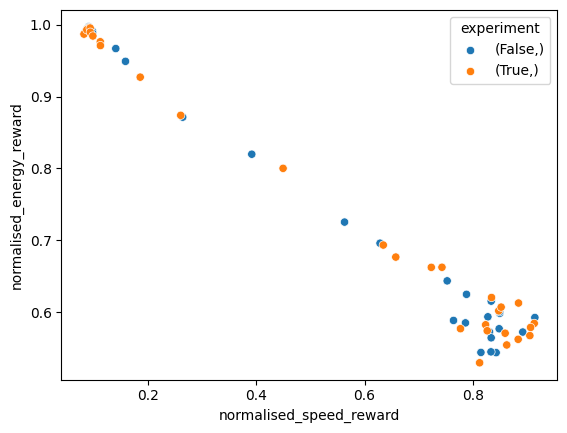

In [6]:
#plot all points
import seaborn as sns
sns.scatterplot(data=grouped_df, x='normalised_speed_reward', y='normalised_energy_reward', hue="experiment")

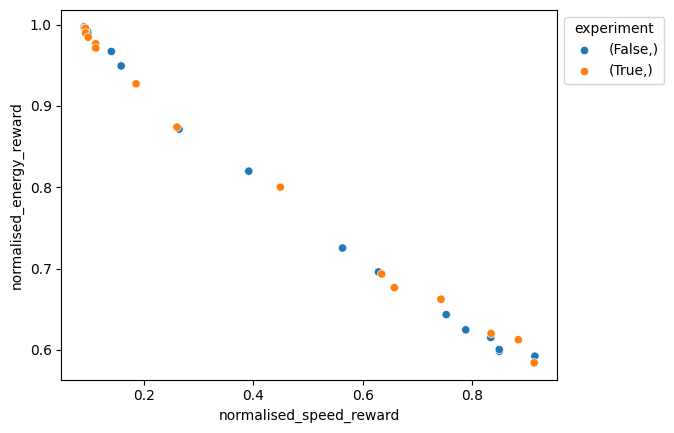

In [7]:
#plot only non-dominated points
ax = sns.scatterplot(data=grouped_df[grouped_df["pareto"]==True], x='normalised_speed_reward', y='normalised_energy_reward', hue="experiment")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [8]:
# num iterations
multi_index_list = ["use_double_q_learning", "weight_index"]
value_list = ["num_iterations"]
grouped_df = df_complete.groupby(multi_index_list)[value_list].mean()
index = grouped_df.index
grouped_df = grouped_df.reset_index()
grouped_df.set_index(index, inplace=True)
multi_index_list.remove("weight_index")
grouped_df["experiment"] = grouped_df[multi_index_list].apply(tuple, axis=1)

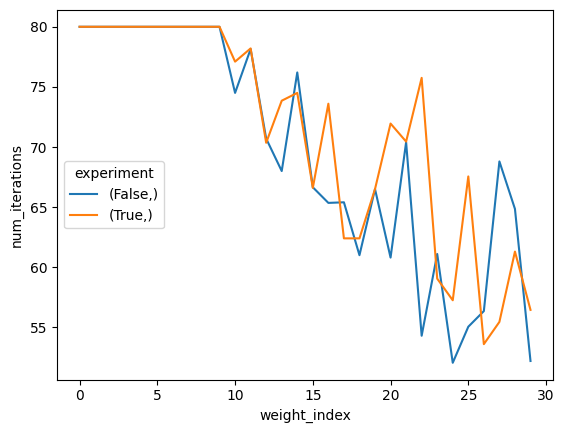

In [9]:
ax = sns.lineplot(grouped_df, x="weight_index", y="num_iterations", hue="experiment")
sns.move_legend(ax, "center left")

df_complete.groupby(["env_config_id", "weight_index"])["num_iterations"].mean()
print()

experiment_id 0 --> collision reward -1
experiment_id 1 --> collision reward 0
--> collision reward of -1 works better.